In [1]:
import sys
sys.path.insert(1, "../")

import importlib
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
def reload_modules():
    import ghost_unfairness
    importlib.reload(ghost_unfairness.fair_dataset)
    importlib.reload(ghost_unfairness.utils)
    
reload_modules()

from ghost_unfairness.fair_dataset import FairDataset, default_mappings

from ghost_unfairness.utils import *

In [3]:
protected = ["sex"]
privileged_classes = [['Male']]
metadata = default_mappings.copy()
metadata['protected_attribute_maps'] = [{1.0: 'Male', 0.0: 'Female'}]

alpha = 0.5
beta = 1

kwargs = {'protected_attribute_names': protected,
          'privileged_classes': [['Male']],
          'metadata':metadata,
          'favorable_classes': [1],
          'beta': beta,
          'alpha': alpha
         }

random_state = 47

In [4]:
model_type = GaussianNB

In [10]:
train_fd, test_fd = get_datasets(10000, 2, 1, kwargs, test_random_state=23)
pmod, pmod_results = get_groupwise_performance(train_fd, train_fd, model_type,
                                               privileged=True, pos_rate=True)
umod, umod_results = get_groupwise_performance(train_fd, train_fd, model_type,
                                               privileged=False, pos_rate=True)
mod, mod_results = get_groupwise_performance(train_fd, train_fd, model_type,
                                             privileged=None, pos_rate=True)

In [11]:
print('pmod_results', *pmod_results, sep='\t')
print('umod_results', *umod_results, sep='\t')
print('mod_results', *mod_results, sep='\t')

pmod_results	-0.14439999999999997	0.7114308553157475	0.9006	0.9934	0.8078	0.9938	0.007	0.6638	0.0482
umod_results	-0.08549999999999996	0.853821166011284	0.88415	0.9145	0.8538	0.9994	0.1704	0.8532	0.1456
mod_results	-0.09459999999999996	0.8196377502383223	0.9088	0.9747	0.8429	0.9992	0.0498	0.7728	0.087


In [11]:
print(np.sqrt(pmod.sigma_))
print(np.sqrt(umod.sigma_))
print(np.sqrt(mod.sigma_))

print()
print(pmod.theta_)
print(umod.theta_)
print(mod.theta_)

[[2.00573837 1.98383537 2.03342    9.10344104 8.94619453 8.87300984
  9.04387588 9.11400756 8.89127101 8.83614299 9.0566191  9.17184482
  8.94199424]
 [1.98593079 2.00377206 1.994759   7.16099391 7.00906928 6.96409956
  7.04028272 7.01627031 6.87565903 6.85069998 7.04619982 6.98795377
  6.89665   ]]
[[4.99469702 4.96408305 5.00668971 9.06256402 8.97281628 9.00031248
  8.87983051 8.93759924 9.03324997 8.97875596 8.99824357 9.03725372
  9.06857324]
 [4.93872809 5.08179264 5.03209227 7.06719716 7.02785345 7.03256593
  6.93632116 6.85150384 7.05568064 6.99611863 6.96360199 6.95937599
  7.01981891]]
[[4.07004701 4.0481439  4.10988213 9.0830503  8.96064524 8.93699829
  8.96240044 9.02626741 8.96256956 8.9084218  9.02752361 9.10496782
  9.00552328]
 [4.06142588 4.14212374 4.10099663 7.11448566 7.01847087 6.9987372
  6.98849555 6.93444202 6.96626778 6.92379547 7.00517196 6.97380301
  6.95903804]]

[[ 2.94675113  3.01623996  3.0288169   7.01266786  7.24985648  7.14361824
   6.74401024  7.026483

In [1]:
import scipy.stats as stats
import math

def plot_normal(mu, sigma, label=None):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label=label)
    
def plot_non_linear_boundary(mu1, mu2, sigma1, sigma2, p, d, label=None):
    x = np.linspace(-200, 200, 10000)
    y = np.log(p/(1-p)) - d*np.log(sigma1/sigma1) 
    y -= 1/(2*sigma1**2)*(x-mu1)**2 
    y += 1/(2*sigma2**2)*(x-mu2)**2
    plt.plot(x, y, label=label)
    plt.legend()

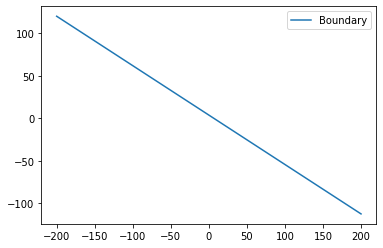

In [5]:
plot_non_linear_boundary(1.5, 11.5, 4.15, 4.15, 0.5, 1, 'Boundary')

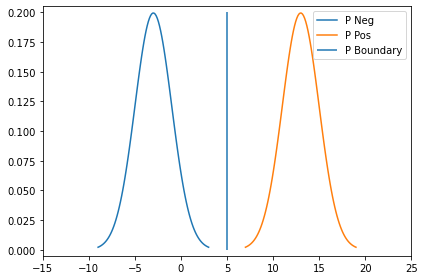

In [6]:
plot_normal(-3, 2, label='P Neg')
plot_normal(13, 2, label='P Pos')
plt.vlines(5, 0, 0.2, label = 'P Boundary')
plt.xlim(-15, 25)
plt.ylim(-0.005, 0.205)
plt.legend()
plt.tight_layout()

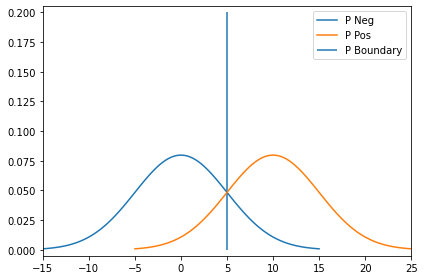

In [7]:
plot_normal(0, 5, label='P Neg')
plot_normal(10, 5, label='P Pos')
plt.vlines(5, 0, 0.2, label = 'P Boundary')
plt.xlim(-15, 25)
plt.ylim(-0.005, 0.205)
plt.legend()
plt.tight_layout()

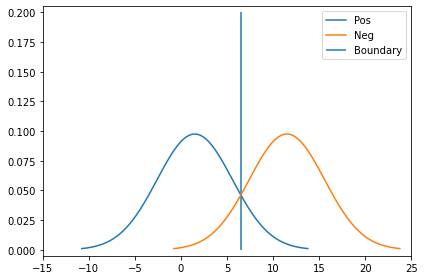

In [8]:
plot_normal(1.5, 4.09, label='Pos')
plot_normal(11.5, 4.09, label='Neg')
plt.vlines(6.5, 0, 0.2, label='Boundary')
plt.xlim(-15, 25)
plt.ylim(-0.005, 0.205)
plt.legend()
plt.tight_layout()

(0.0, 0.2)

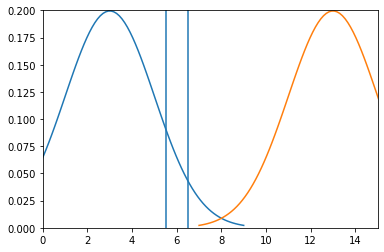

In [9]:
plot_normal(3, 2)
plot_normal(13, 2)
# plt.vlines(6.5, 0, 0.2)
# plot_normal(0, 5)
# plot_normal(10, 5)
plt.vlines(5.5, 0, 0.2)
plt.vlines(6.5, 0, 0.2)
plt.xlim(0, 15)
plt.ylim(0, 0.2)

(0.0, 0.2)

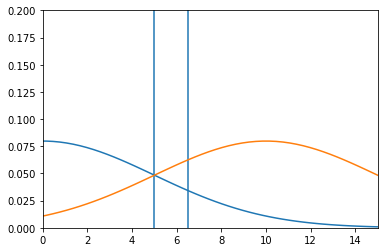

In [10]:
# plot_normal(3, 2)
# plot_normal(10, 2)
# plt.vlines(6.5, 0, 0.2)
plot_normal(0, 5)
plot_normal(10, 5)
plt.vlines(5, 0, 0.2)
plt.vlines(6.5, 0, 0.2)
plt.xlim(0, 15)
plt.ylim(0, 0.2)

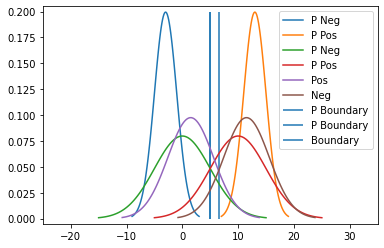

In [13]:
plot_normal(-3, 2, label='P Neg')
plot_normal(13, 2, label='P Pos')
plt.vlines(5, 0, 0.2, label = 'P Boundary')
plot_normal(0, 5, label='P Neg')
plot_normal(10, 5, label='P Pos')
plt.vlines(5, 0, 0.2, label = 'P Boundary')
plot_normal(1.5, 4.09, label='Pos')
plot_normal(11.5, 4.09, label='Neg')
plt.vlines(6.5, 0, 0.2, label='Boundary')
plt.xlim(-25, 35)
plt.ylim(-0.005, 0.205)
plt.legend()

In [20]:
model_type = LogisticRegression
train_fd, test_fd = get_datasets(10000, 1, 1, kwargs, test_random_state=23)
pmod, pmod_results = get_groupwise_preformance(train_fd, test_fd, model_type,
                                               privileged=True)
umod, umod_results = get_groupwise_preformance(train_fd, test_fd, model_type,
                                               privileged=False)
mod, mod_results = get_groupwise_preformance(train_fd, test_fd, model_type,
                                             privileged=None)

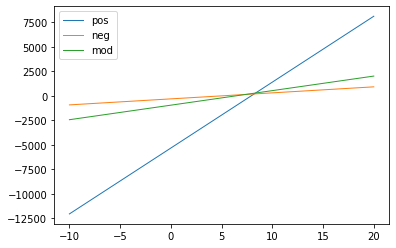

In [21]:
%matplotlib inline
plot_lr_boundary(pmod, plt, "pos")
plot_lr_boundary(umod, plt, "neg")
plot_lr_boundary(mod, plt, "mod")
plt.show()

In [22]:
print("Loss D_p t_p", 1 - pmod_results[3])
print("Loss D_u t_u", 1 - umod_results[4])
print("Loss D t", 1 - mod_results[2])

Loss D_p t_p 0.005800000000000027
Loss D_u t_u 0.1582
Loss D t 0.09599999999999997


In [23]:
mods = [pmod, umod, mod]
mods_results = [pmod_results, umod_results, mod_results]
theta_p = None
theta_u = None
theta = None
min_loss_p = 1
min_loss_u = 1
min_loss = 1
for i in range(len(mods)):
    if (1 - mods_results[i][3]) < min_loss_p:
        theta_p = mods[i]
        min_loss_p = 1 - mods_results[i][3]
    if (1 - mods_results[i][4]) < min_loss_u:
        theta_u = mods[i]
        min_loss_u = 1 - mods_results[i][4]
        
    if (1 - mods_results[i][2]) < min_loss:
        theta = mods[i]
        min_loss = 1 - mods_results[i][2]
        
print(1-min_loss_p, 1-min_loss_u, 1-min_loss)
print((beta*min_loss_p + 1*min_loss_u)/(1+beta))
print(min_loss)
assert round(min_loss, 8) - round((beta*min_loss_p + 1*min_loss_u)/(1+beta), 8) >= 0

0.9942 0.8418 0.904
0.08200000000000002
0.09599999999999997


In [24]:
ptrain_results = get_classifier_metrics(pmod, train_fd)

print(ptrain_results)
utrain_results = get_classifier_metrics(umod, train_fd)

print(utrain_results)
train_results = get_classifier_metrics(mod, train_fd)

print(train_results)

[-0.13690000000000002, 0.7266373801916932, 0.89755, 0.9934, 0.8017]
[-0.0746, 0.8705310656022215, 0.8819, 0.9238, 0.84]
[-0.08850000000000002, 0.8305247031788586, 0.90405, 0.9774, 0.8307]


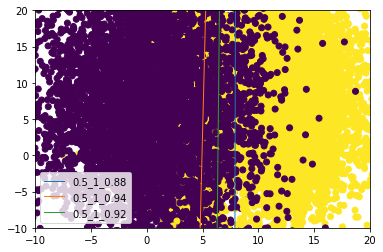

In [25]:
plot_lr_boundary(pmod, plt, '_'.join([str(x) for x in [alpha, beta, 0.88]]))
plot_lr_boundary(umod, plt, '_'.join([str(x) for x in [alpha, beta, 0.94]]))
plot_lr_boundary(mod, plt, '_'.join([str(x) for x in [alpha, beta, 0.92]]))
test_fd_x, test_fd_y = train_fd.get_xy(keep_protected=False)
plt.scatter(test_fd_x['r_0'], test_fd_x['f_0'], c=test_fd_y, label=None)
plt.xlim(-10, 20)
plt.ylim(-10, 20)
plt.legend()

In [26]:
dict(zip(test_fd.protected_attribute_names, test_fd.privileged_protected_attributes))

{'sex': array([1.])}

In [27]:
import copy

def get_edge_lr(model, end, interval, criteria):
    cms = {}
    c = 0
    while True:
        temp_mod = copy.deepcopy(model)
        temp_mod.intercept_ = [i + c for i in temp_mod.intercept_]
        cm = get_classifier_metrics(temp_mod, test_fd)

        cms[c] = cm
        if cm[criteria] < end:
            break
        c -= interval
        
    return temp_mod, cms

    
def get_lr_boundary_range(model, criteria):
    cms = {}
    temp_mods = [copy.deepcopy(model)]
    left_mod, cms_left = get_edge_lr(model, 0.6, -0.1, criteria)
    temp_mods.append(left_mod)
    cms = cms_left.copy()
    right_mod, cms_right = get_edge_lr(model, 0.6, 0.1, criteria)
    temp_mods.append(right_mod)
    cms.update(cms_right)

    for i, lr in enumerate(temp_mods):
        plot_lr_boundary(lr, plt, str(i))
        
    return temp_mods, cms

In [28]:
def plot_cms(cms):
    skeys = sorted(cms.keys())
    accs = [cms[i][3] for i in skeys]
    plt.plot(skeys, accs, label='Pos Acc')

    accs = [cms[i][4] for i in skeys]
    plt.plot(skeys, accs, label='Neg Acc')
    plt.legend()

    accs = [cms[i][2] for i in skeys]
    plt.plot(skeys, accs, label='Ov Acc')
    plt.legend()

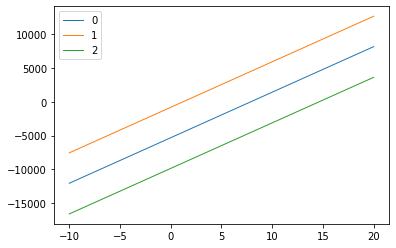

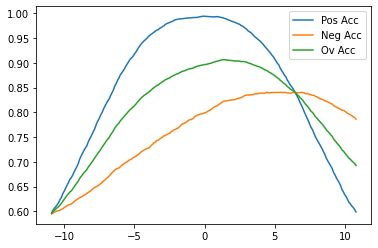

In [29]:
temp_mods, cms = get_lr_boundary_range(pmod, 3)
plt.show()
plot_cms(cms)

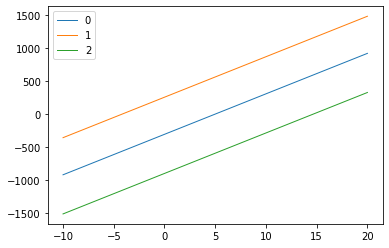

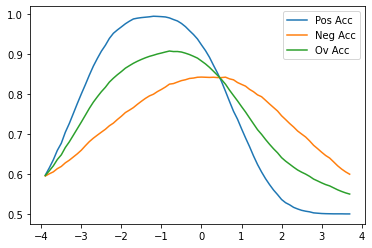

In [30]:
temp_mods, cms = get_lr_boundary_range(umod, 4)
plt.show()
plot_cms(cms)

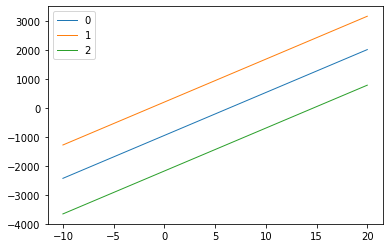

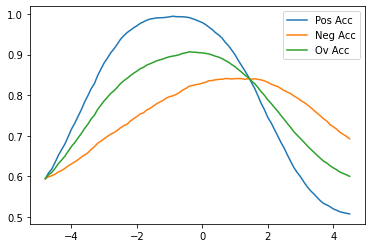

In [31]:
temp_mods, cms = get_lr_boundary_range(mod, 2)
plt.show()
plot_cms(cms)

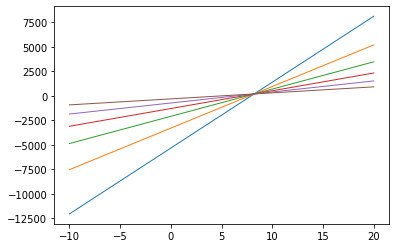

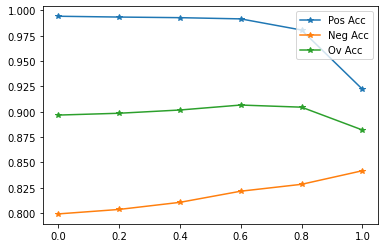

In [32]:
gammas = [0, 0.2, 0.4, 0.6, 0.8, 1]

cms = {}

for g in gammas:
    temp_mod = copy.deepcopy(pmod)
    intercepts = np.add((1-g)*pmod.intercept_, g*umod.intercept_)
    temp_mod.intercept_ = intercepts
    coefs = np.add((1-g)*pmod.coef_, g*umod.coef_)
    temp_mod.coef_ = coefs
    cm = get_classifier_metrics(temp_mod, test_fd)
    cms[g] = cm
    plot_lr_boundary(temp_mod, plt, None)
    
    
# plt.xlim(-10, -5)
# plt.ylim(20, 25)
plt.show()
    
skeys = sorted(cms.keys())
accs = [cms[i][3] for i in skeys]
plt.plot(skeys, accs, '*-', label='Pos Acc')

accs = [cms[i][4] for i in skeys]
plt.plot(skeys, accs, '*-', label='Neg Acc')
plt.legend()

accs = [cms[i][2] for i in skeys]
plt.plot(skeys, accs, '*-', label='Ov Acc')
plt.legend()

# plt.hlines(0.935, 0, 1)

In [33]:
print(*[cms[i] for i in cms], sep='\n')

[-0.14579999999999999, 0.7096774193548387, 0.8967, 0.9942, 0.7992]
[-0.13940000000000002, 0.7228628230616302, 0.8985, 0.9934, 0.8036]
[-0.129, 0.7440476190476191, 0.9017, 0.9928, 0.8106]
[-0.11440000000000006, 0.7746256895193064, 0.9066, 0.9916, 0.8216]
[-0.09499999999999997, 0.8168145005784806, 0.9045, 0.9806, 0.8284]
[-0.08479999999999999, 0.8532364139840776, 0.882, 0.9222, 0.8418]


In [34]:
p = [cms[i][3] for i in cms]
u = [cms[i][4] for i in cms]
u.reverse()
print(p)
print(u)
print([p[0] - p[i] for i in range(1, len(p))])
print([u[0] - u[i] for i in range(1, len(u))])

[0.9942, 0.9934, 0.9928, 0.9916, 0.9806, 0.9222]
[0.8418, 0.8284, 0.8216, 0.8106, 0.8036, 0.7992]
[0.0008000000000000229, 0.0013999999999999568, 0.0025999999999999357, 0.013599999999999945, 0.07199999999999995]
[0.013399999999999967, 0.020199999999999996, 0.031200000000000006, 0.03820000000000001, 0.04259999999999997]


1. First get the decision boundary (Use NB or LR. maybe both are doable.)
2. Using the boundary get $P(\hat{y} = 1| u/p, \theta_u/\theta_p)$.
3. Show that, $DI(\theta_p)$ < $DI(\theta)$ < $DI(\theta_u)$

In [35]:
from scipy.stats import norm
def get_positive_prediction_rate(mu1, mu2, sigma1, sigma2, mu_avg):
    rv1 = norm(loc=mu1, scale=sigma1)
    # print(rv1.cdf(mu_avg))
    rv2 = norm(loc=mu2, scale=sigma2)
    # print(rv2.cdf(mu_avg))

    return (1 - 0.5*rv1.cdf(mu_avg) - 0.5 * rv2.cdf(mu_avg))

In [36]:
print(get_positive_prediction_rate(0, 9, 5, 5, 6.5))
print(get_positive_prediction_rate(3, 10, 2, 2, 6.5))

0.3941314729298117
0.5


In [37]:
0.3941314729298117/0.5

0.7882629458596234

In [38]:
print(get_positive_prediction_rate(0, 9, 5, 5, 5))
print(get_positive_prediction_rate(3, 10, 2, 2, 5))
get_positive_prediction_rate(0, 9, 5, 5, 5)/get_positive_prediction_rate(3, 10, 2, 2, 5)

0.4733999276740303
0.5762227943028405


0.8215570997096472

In [39]:
0.5/0.577

0.8665511265164645

In [40]:
print(get_positive_prediction_rate(0, 10, 5, 5, 5.495))
print(get_positive_prediction_rate(3, 10, 2, 2, 5.495))
get_positive_prediction_rate(0, 10, 5, 5, 5.495)/get_positive_prediction_rate(3, 10, 2, 2, 5.495)

0.4760449365530461
0.5469808818805002


0.8703136660214176

In [41]:
get_positive_prediction_rate(0, 10, 5, 5, 5.45916)/get_positive_prediction_rate(3, 10, 2, 2, 5.45916)

0.8704019599082464

In [42]:
print(get_positive_prediction_rate(0, 9, 5, 5, 5.75))
print(get_positive_prediction_rate(3, 10, 2, 2, 5.75))
get_positive_prediction_rate(0, 9, 5, 5, 5.75)/get_positive_prediction_rate(3, 10, 2, 2, 5.75)

0.4336129124156428
0.5338862079514434


0.8121822702246686

In [43]:
0.4637/0.5333

0.8694918432402026

5		0.8630930829826579
5.25		0.8633581273930458
5.5		0.8607445711688895
5.75		0.8552113854984534
6.0		0.8468364943145887
6.25		0.8358012966730142
6.5		0.8223679909385787
6.75		0.8068537748189683
7.0		0.7896057928155817
7.25		0.7709797585841528
7.5		0.7513238914857889
7.75		0.7309685558482791
8.0		0.7102210333098821


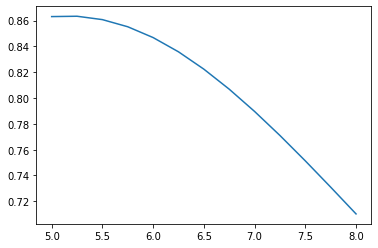

In [44]:
i = 5
ratios = []
while i <= 8:
    ratio = get_positive_prediction_rate(0, 10, 5, 5, i)/get_positive_prediction_rate(3, 13, 2, 2, i)
    ratios.append(ratio)
    print(i, ratio, sep='\t\t')
    i+= 0.25
    
plt.plot(np.arange(5, 8.25, 0.25), ratios)

5		0.8215570997096472
5.25		0.8205218538264236
5.5		0.8173419875105453
5.75		0.8121822702246686
6.0		0.8053358165743911
6.25		0.7972028096019748
6.5		0.7882629458596234


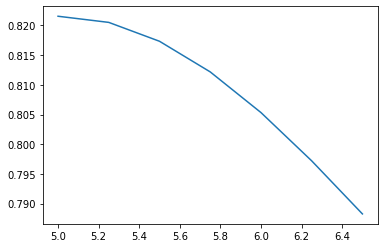

In [45]:
i = 5
ratios = []
while i <= 6.5:
    ratio = get_positive_prediction_rate(0, 9, 5, 5, i)/get_positive_prediction_rate(3, 10, 2, 2, i)
    ratios.append(ratio)
    print(i, ratio, sep='\t\t')
    i+= 0.25
    
plt.plot(np.arange(5, 6.75,0.25), ratios)

In [46]:
get_positive_prediction_rate(0, 9, 5, 5, 5.495)/get_positive_prediction_rate(3, 10, 2, 2, 5.495)

0.8174257592607983

In [47]:
print(get_positive_prediction_rate(0, 10, 5, 5, 8))
print(get_positive_prediction_rate(3, 13, 2, 2, 8))
get_positive_prediction_rate(0, 10, 5, 5, 8)/get_positive_prediction_rate(3, 13, 2, 2, 8)

0.35511051665494103
0.5


0.7102210333098821

In [48]:
print(get_positive_prediction_rate(0, 10, 5, 5, 5))
print(get_positive_prediction_rate(3, 13, 2, 2, 5))
get_positive_prediction_rate(0, 10, 5, 5, 5)/get_positive_prediction_rate(3, 13, 2, 2, 5)

0.5
0.579311791344812


0.8630930829826579

In [49]:
print(get_positive_prediction_rate(0, 10, 5, 5, 6.5))
print(get_positive_prediction_rate(3, 13, 2, 2, 6.5))
get_positive_prediction_rate(0, 10, 5, 5, 6.5)/get_positive_prediction_rate(3, 13, 2, 2, 6.5)

0.42741841618126863
0.5197410659107132


0.8223679909385787